In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
sns.set()

In [4]:
test=pd.read_csv('/content/drive/MyDrive/train.csv')
test.sample(6)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2095,463932,Female,Yes,72,Yes,Artist,1.0,Average,3.0,Cat_6,B
4887,462129,Female,No,41,Yes,Artist,9.0,Low,1.0,Cat_6,B
4496,461782,Female,Yes,45,Yes,Artist,NaN,High,5.0,Cat_6,C
4468,466795,Male,NaN,55,Yes,Entertainment,NaN,Average,5.0,Cat_6,B
1461,461915,Male,Yes,51,No,Artist,NaN,Average,2.0,Cat_2,B
2466,462225,Male,Yes,49,No,Engineer,1.0,Average,8.0,Cat_4,D


In [5]:
test.describe()


,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [8]:
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test, train = train_test_split(train)

In [9]:
train.describe()

,ID,Age,Work_Experience,Family_Size
count,2017.000000,2017.000000,1804.000000,1943.000000
mean,463462.079822,43.935052,2.637472,2.845085
std,2566.875541,16.945912,3.409629,1.551115
min,458984.000000,18.000000,0.000000,1.000000
25%,461216.000000,30.000000,0.000000,2.000000
50%,463436.000000,41.000000,1.000000,2.000000
75%,465693.000000,53.000000,4.000000,4.000000
max,467972.000000,89.000000,14.000000,9.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 6395 to 4295
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2017 non-null   int64  
 1   Gender           2017 non-null   object 
 2   Ever_Married     1987 non-null   object 
 3   Age              2017 non-null   int64  
 4   Graduated        1996 non-null   object 
 5   Profession       1983 non-null   object 
 6   Work_Experience  1804 non-null   float64
 7   Spending_Score   2017 non-null   object 
 8   Family_Size      1943 non-null   float64
 9   Var_1            1997 non-null   object 
 10  Segmentation     2017 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 189.1+ KB


In [11]:
train.isna().sum()

ID                   0
Gender               0
Ever_Married        30
Age                  0
Graduated           21
Profession          34
Work_Experience    213
Spending_Score       0
Family_Size         74
Var_1               20
Segmentation         0
dtype: int64

In [12]:
train['Ever_Married'].fillna(method='ffill',inplace=True)
train['Profession'].fillna(method='ffill',inplace=True)
train['Graduated'].fillna(method='bfill',inplace=True)
train['Work_Experience'].fillna(method='bfill',inplace=True)
train['Family_Size'].fillna(method='bfill',inplace=True)

In [13]:
train.isna().sum()

ID                  0
Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession          0
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              20
Segmentation        0
dtype: int64

In [14]:
train1=train[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size']]
train1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
6395,Male,Yes,70,Yes,Lawyer,3.0,Low,1.0
956,Male,No,20,No,Healthcare,12.0,Low,4.0
20,Male,Yes,49,Yes,Homemaker,12.0,Low,1.0
1903,Male,No,31,No,Healthcare,7.0,Low,4.0
4955,Female,Yes,40,Yes,Artist,7.0,Low,2.0
...,...,...,...,...,...,...,...,...
2637,Female,Yes,65,Yes,Artist,0.0,Low,2.0
649,Female,Yes,73,Yes,Lawyer,1.0,Low,1.0
7195,Female,No,49,Yes,Lawyer,0.0,Low,2.0
1270,Male,Yes,46,Yes,Entertainment,6.0,Average,5.0


In [15]:
train1.groupby('Profession').mean()

,Age,Work_Experience,Family_Size
Profession,,,
Artist,46.168301,2.614379,2.555556
Doctor,38.025641,2.820513,2.712821
Engineer,43.355191,2.508197,2.983607
Entertainment,42.984000,2.712000,2.796000
Executive,51.131579,2.203947,3.315789
Healthcare,27.374631,2.923304,3.684366
Homemaker,37.929825,5.947368,2.298246
Lawyer,75.927711,1.506024,1.837349
Marketing,38.873016,2.396825,3.111111


In [16]:
train1.groupby('Ever_Married').mean()

,Age,Work_Experience,Family_Size
Ever_Married,,,
No,32.517618,3.086270,2.976914
Yes,51.804858,2.355946,2.741206


In [17]:
train1.groupby('Gender').mean()

,Age,Work_Experience,Family_Size
Gender,,,
Female,43.624861,2.916759,2.771365
Male,44.185484,2.441756,2.890681


In [18]:
train1.groupby('Spending_Score').mean()

,Age,Work_Experience,Family_Size
Spending_Score,,,
Average,46.572895,2.595483,3.117043
High,59.472843,2.099042,2.904153
Low,38.883320,2.820049,2.708299


In [19]:
train1['Profession']=train1['Profession'].map({'Artist':0, 
                                               'Doctor':1, 
                                               'Engineer':2,
                                               'Entertainment':3,
                                               'Executive':4,
                                               'Healthcare':5,
                                               'Homemaker':6,
                                               'Lawyer':7, 
                                               'Marketing':8})
train1['Spending_Score']=train1['Spending_Score'].map({'Average':0,
                                                       'High':1,
                                                       'Low':2})
train1['Gender']=train1['Gender'].map({'Female':0,
                                       'Male':1})
train1['Ever_Married']=train1['Ever_Married'].map({'No':0,
                                                  'Yes':1})
train1['Graduated']=train1['Graduated'].map({'No':0,
                                                  'Yes':1})

<ipython-input-19-6d661325dfb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['Profession']=train1['Profession'].map({'Artist':0,
<ipython-input-19-6d661325dfb1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['Spending_Score']=train1['Spending_Score'].map({'Average':0,
<ipython-input-19-6d661325dfb1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [20]:
train1.sample(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
5309,0,1,61,0,2,0.0,2,1.0
273,1,1,43,1,0,0.0,2,2.0
3806,1,1,55,1,3,0.0,0,4.0
3446,0,1,89,1,7,0.0,1,2.0
2132,1,1,74,1,7,1.0,2,1.0


In [21]:
train1.corr().round(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Gender,1.00,0.11,0.02,-0.02,0.03,-0.07,-0.03,0.04
Ever_Married,0.11,1.00,0.56,0.20,-0.12,-0.10,-0.62,-0.08
Age,0.02,0.56,1.00,0.21,0.08,-0.18,-0.26,-0.28
Graduated,-0.02,0.20,0.21,1.00,-0.27,0.01,-0.15,-0.21
Profession,0.03,-0.12,0.08,-0.27,1.00,-0.01,0.24,0.07
Work_Experience,-0.07,-0.10,-0.18,0.01,-0.01,1.00,0.04,-0.01
Spending_Score,-0.03,-0.62,-0.26,-0.15,0.24,0.04,1.00,-0.11
Family_Size,0.04,-0.08,-0.28,-0.21,0.07,-0.01,-0.11,1.00


<Axes: title={'center': 'Correlation Map'}>

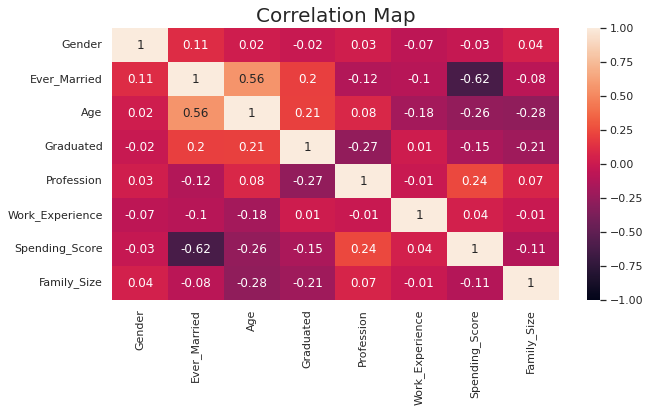

In [22]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Correlation Map",fontsize=20)
sns.heatmap(train1.corr().round(2),vmin=-1,vmax=1,annot=True)

In [23]:
stand=StandardScaler()
stand.fit(train1)

StandardScaler()

In [24]:
stand.transform(train1)

array([[ 0.89852528,  0.83022872,  1.53850744, ...,  0.10094989,
         0.75522291, -1.19047718],
       [ 0.89852528, -1.20448736, -1.41278838, ...,  2.72637012,
         0.75522291,  0.75328359],
       [ 0.89852528,  0.83022872,  0.29896319, ...,  2.72637012,
         0.75522291, -1.19047718],
       ...,
       [-1.11293475, -1.20448736,  0.29896319, ..., -0.77419019,
         0.75522291, -0.54255692],
       [ 0.89852528,  0.83022872,  0.12188544, ...,  0.97608997,
        -1.61196374,  1.40120384],
       [-1.11293475, -1.20448736, -0.23227005, ...,  0.97608997,
         0.75522291, -1.19047718]])

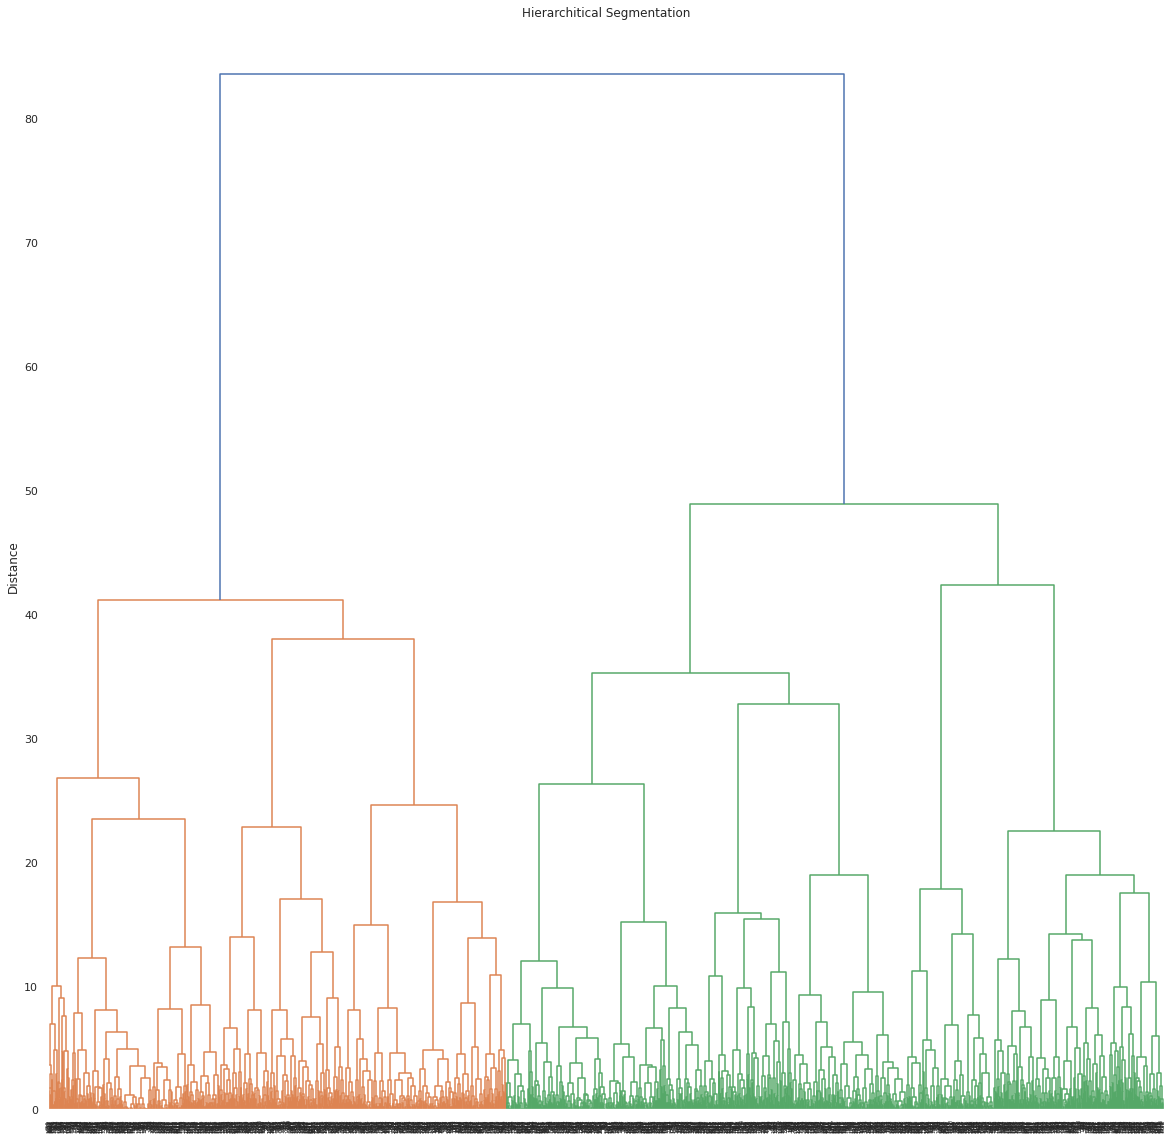

In [25]:
link=linkage(stand.transform(train1),'ward')
plt.figure(figsize=(20,20))
dendrogram(link,p=5)
plt.ylabel('Distance')
plt.title('Hierarchitical Segmentation')
plt.show()

In [26]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 6395 to 4295
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2017 non-null   int64  
 1   Ever_Married     2017 non-null   int64  
 2   Age              2017 non-null   int64  
 3   Graduated        2017 non-null   int64  
 4   Profession       2017 non-null   int64  
 5   Work_Experience  2017 non-null   float64
 6   Spending_Score   2017 non-null   int64  
 7   Family_Size      2017 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 141.8 KB


In [27]:
train1[['Work_Experience','Family_Size']]=train1[['Work_Experience','Family_Size']].astype('int32')
#train1['Family_Size']=train1['Family_Size'].asty

<ipython-input-27-237d32f99072>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1[['Work_Experience','Family_Size']]=train1[['Work_Experience','Family_Size']].astype('int32')


In [28]:
stand=StandardScaler()
stand.fit_transform(train1)

array([[ 0.89852528,  0.83022872,  1.53850744, ...,  0.10094989,
         0.75522291, -1.19047718],
       [ 0.89852528, -1.20448736, -1.41278838, ...,  2.72637012,
         0.75522291,  0.75328359],
       [ 0.89852528,  0.83022872,  0.29896319, ...,  2.72637012,
         0.75522291, -1.19047718],
       ...,
       [-1.11293475, -1.20448736,  0.29896319, ..., -0.77419019,
         0.75522291, -0.54255692],
       [ 0.89852528,  0.83022872,  0.12188544, ...,  0.97608997,
        -1.61196374,  1.40120384],
       [-1.11293475, -1.20448736, -0.23227005, ...,  0.97608997,
         0.75522291, -1.19047718]])

In [30]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans=kmeans.fit(stand.fit_transform(train1))
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [31]:
wcss

[16135.999999999989,
 12517.762108236551,
 11054.545093168554,
 9748.33546837372,
 8974.13840878725,
 8360.808601688002,
 7859.2854841504595,
 7366.2047363301845,
 7044.700964052221,
 6659.578960020437]

Text(0.5, 0, 'Segmentation Range')

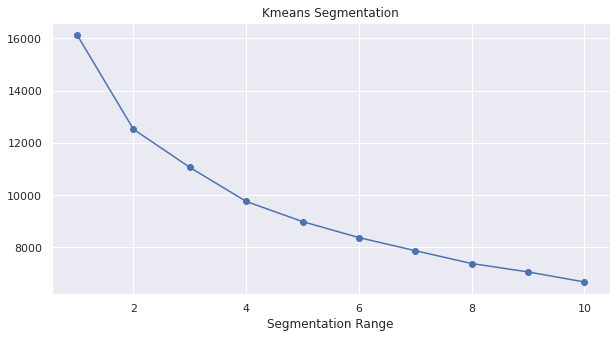

In [32]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Kmeans Segmentation')
plt.xlabel('Segmentation Range')

In [34]:
kmeans=KMeans(n_clusters=4,random_state=40)
kmeans.fit(stand.fit_transform(train1))
kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 3, ..., 3, 2, 3], dtype=int32)

In [35]:
kmeans_seg=pd.DataFrame(train1)
kmeans_seg["segmentation"]=kmeans.labels_
kmeans_seg

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,segmentation
6395,1,1,70,1,7,3,2,1,0
956,1,0,20,0,5,12,2,4,1
20,1,1,49,1,6,12,2,1,3
1903,1,0,31,0,5,7,2,4,1
4955,0,1,40,1,0,7,2,2,3
...,...,...,...,...,...,...,...,...,...
2637,0,1,65,1,0,0,2,2,3
649,0,1,73,1,7,1,2,1,0
7195,0,0,49,1,7,0,2,2,3
1270,1,1,46,1,3,6,0,5,2


In [36]:
kmeans_seg_grp=kmeans_seg.groupby('segmentation').mean().round(2)
kmeans_seg_grp

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
0,0.64,0.95,69.97,0.54,5.31,1.42,1.48,2.05
1,0.55,0.08,27.24,0.17,4.19,2.97,1.98,3.98
2,0.58,0.99,46.80,0.75,1.48,2.57,0.25,3.21
3,0.48,0.38,40.10,0.90,1.52,3.19,1.99,1.87


In [37]:
kmeans_seg_grp.rename({0:'Average',1:'Low',2:'work & spend',3:'Good Profeesion'},inplace=True)
kmeans_seg_grp

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
segmentation,,,,,,,,
Average,0.64,0.95,69.97,0.54,5.31,1.42,1.48,2.05
Low,0.55,0.08,27.24,0.17,4.19,2.97,1.98,3.98
work & spend,0.58,0.99,46.80,0.75,1.48,2.57,0.25,3.21
Good Profeesion,0.48,0.38,40.10,0.90,1.52,3.19,1.99,1.87


In [38]:
pca=PCA()
pca.fit(stand.fit_transform(train1))
pca.explained_variance_ratio_.cumsum()

array([0.24350474, 0.4596982 , 0.59705626, 0.70875935, 0.81190579,
       0.88797731, 0.93891213, 0.97334626, 1.        ])

Text(0.5, 0, 'Clustering Range')

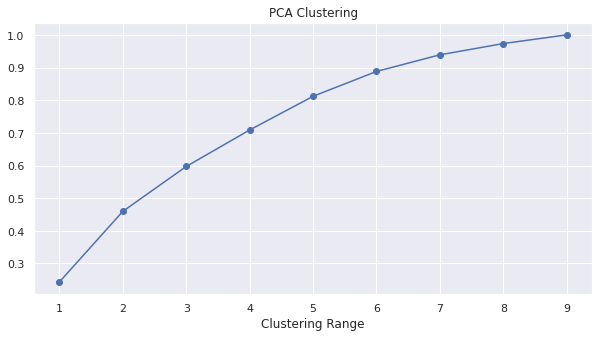

In [39]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10),pca.explained_variance_ratio_.cumsum(),marker='o')
plt.title('PCA Clustering')
plt.xlabel("Clustering Range")

In [40]:
pca=PCA(n_components=4)
pca.fit(stand.fit_transform(train1))
pca.components_

array([[-0.04901836, -0.555607  , -0.44020229, -0.36457188,  0.27273702,
         0.11629762,  0.47383596,  0.18938236, -0.11794294],
       [ 0.14129392,  0.22855546,  0.34394837, -0.3206618 ,  0.48108627,
        -0.20425578, -0.08111323,  0.12548785, -0.64123551],
       [ 0.19012745,  0.14452305, -0.3405276 , -0.22034676, -0.23590288,
         0.0600978 , -0.4558418 ,  0.71477241,  0.02235271],
       [-0.75388755,  0.10151015,  0.08005763, -0.06288938,  0.13509482,
         0.57993517, -0.20476211,  0.06712409, -0.09988186]])

In [41]:
train1.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'segmentation'],
      dtype='object')

In [42]:
pca_seg=pd.DataFrame(pca.components_,index=['comp 1','comp 2','comp 3','comp 4'],columns=['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'segmentation']).round(3)
pca_seg

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,segmentation
comp 1,-0.049,-0.556,-0.440,-0.365,0.273,0.116,0.474,0.189,-0.118
comp 2,0.141,0.229,0.344,-0.321,0.481,-0.204,-0.081,0.125,-0.641
comp 3,0.190,0.145,-0.341,-0.220,-0.236,0.060,-0.456,0.715,0.022
comp 4,-0.754,0.102,0.080,-0.063,0.135,0.580,-0.205,0.067,-0.100


Text(0.5, 1.0, 'Component Map')

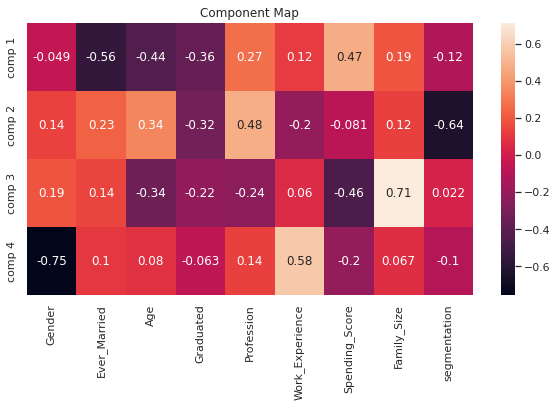

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(pca_seg,annot=True)
plt.title('Component Map')